In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation

In [32]:
dataX = np.arange(10)
dataY = np.arange(10)
dataY[:5] = 0
dataY[5:] = 1

In [33]:
class LogReg1D:
    def __init__(self, dataX = np.array([]), dataY = np.array([])):
        self.dataX = dataX
        self.dataY = dataY
        self.w, self.b = 0, 0
    
    def reset(self):
        self.w, self.b = 0, 0

    def f_wb(self, x):
        return self.w*x+self.b
    
    def model(self, x):
        return 1/(1+math.e**-self.f_wb(x))
    
    def loss(self):
        return -1/len(dataX) * sum(dataY*math.log(self.model(dataX))+(1-dataY)*(1-math.log(self.model(dataX))))
    
    def wDer(self):
        return 1/len(dataX) * sum((self.model(dataX)-dataY)*dataX)
    
    def bDer(self):
        return 1/len(dataX) * sum((self.model(dataX)-dataY))
    
    def train(self, alpha, iterations):
        for _ in range(iterations):
            self.w, self.b = self.w-alpha*self.wDer(), self.b-alpha*self.bDer()

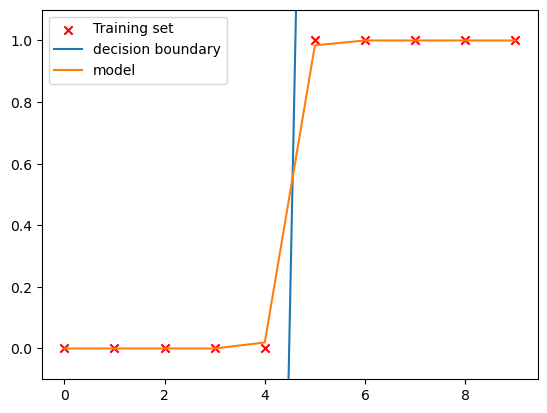

In [34]:
lgRModel = LogReg1D(dataX, dataY)
lgRModel.train(10, 1000)
plt.scatter(dataX, dataY, c='r', marker='x', label='Training set')
plt.plot(dataX, lgRModel.w*dataX+lgRModel.b, label='decision boundary')
plt.plot(dataX, lgRModel.model(dataX), label='model')
plt.ylim(-0.1,1.1)
plt.legend()
plt.show()

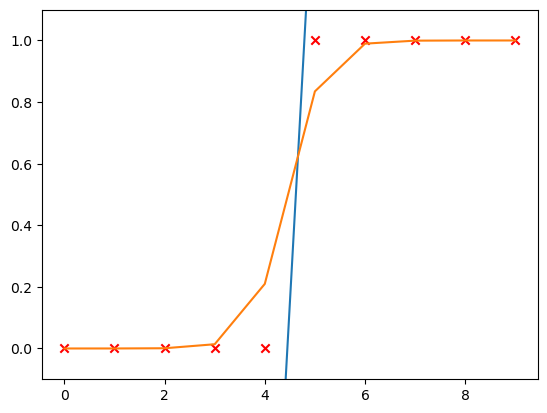

In [36]:
fig, ax = plt.subplots()
plt.ylim(-0.1,1.1)
xdata, ydata = [], []
ln, = ax.plot([], [], 'ro')

def init():
    ax.scatter(dataX, dataY, c='r', marker='x', label='Training set')
    return ln,

def update(frame):
    ax.cla()
    plt.ylim(-0.1,1.1)
    lgRModel.reset()
    lgRModel.train(frame, 1000)
    ax.scatter(dataX, dataY, c='r', marker='x', label='Training set')
    ax.plot(dataX, lgRModel.w*dataX+lgRModel.b, label='decision boundary')
    ax.plot(dataX, lgRModel.model(dataX), label='model')
    return ln,

ani = FuncAnimation(fig, update, frames=np.arange(0.01, 1, 0.01),
                    init_func=init, blit=True)
ani.save('logisticRegression.gif')